In [2]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
df = pd.read_csv('datafolda/Survived.csv')
df.head(2) # 先頭2行の確認

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C


In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df.shape

(891, 11)

In [22]:
# Age列を平均値で穴埋め
df["Age"] = df["Age"].fillna(df["Age"].mean())
# Embarked列を最頻値で穴埋め
df["Embarked"] = df['Embarked'].fillna(df['Embarked'].mode())

In [24]:
# 特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare']

x = df[col]
t = df['Survived']

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,t,
test_size = 0.2,random_state = 0)
# x_trainのサイズの確認
x_train.shape

(712, 5)

In [28]:
model = tree.DecisionTreeClassifier(max_depth = 5,
 random_state = 0,class_weight ='balanced')

model.fit(x_train,y_train) # 学習

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

In [30]:
model.score(X = x_test,y = y_test)

0.7374301675977654

In [32]:
def learn(x,t,depth=3):
    x_train,x_test,y_train,y_test = train_test_split(x,
        t,test_size = 0.2,random_state = 0)
    model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0,class_weight="balanced")
    model.fit(x_train,y_train)

    score=model.score(X=x_train,y=y_train)
    score2=model.score(X=x_test,y=y_test)
    return round(score,3),round(score2,3),model

In [36]:
for j in range(1,15): # jは木の深さ jには1～14が入る
    # xは特徴量、tは正解データ
    train_score,test_score,model = learn(x,t,depth = j)
    sentence="訓練データの正解率{}"
    sentence2="訓練データの正解率{}"
    total_sentence='深さ{}:'+sentence+sentence2
    print(total_sentence.format(j,
    train_score,test_score))

深さ1:訓練データの正解率0.659訓練データの正解率0.704
深さ2:訓練データの正解率0.699訓練データの正解率0.732
深さ3:訓練データの正解率0.704訓練データの正解率0.737
深さ4:訓練データの正解率0.698訓練データの正解率0.726
深さ5:訓練データの正解率0.722訓練データの正解率0.737
深さ6:訓練データの正解率0.77訓練データの正解率0.698
深さ7:訓練データの正解率0.771訓練データの正解率0.648
深さ8:訓練データの正解率0.781訓練データの正解率0.631
深さ9:訓練データの正解率0.83訓練データの正解率0.704
深さ10:訓練データの正解率0.851訓練データの正解率0.687
深さ11:訓練データの正解率0.878訓練データの正解率0.676
深さ12:訓練データの正解率0.892訓練データの正解率0.654
深さ13:訓練データの正解率0.909訓練データの正解率0.654
深さ14:訓練データの正解率0.92訓練データの正解率0.654


In [38]:
df2 = pd.read_csv('datafolda/Survived.csv')
print(df2['Age'].mean()) # 平均値の計算
print(df2['Age'].median()) # 中央値の計算

29.69911764705882
28.0


In [60]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df2.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [42]:
df2.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [44]:
pd.pivot_table(df2,index = 'Survived',columns = 'Pclass',
values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


In [50]:
pd.pivot_table(df2,index = 'Survived',columns = 'Pclass',
values = 'Age',aggfunc='max')

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


In [52]:
# Age列の欠損値行を抜き出すのに必要（欠損だとTrue)
is_null = df2['Age'].isnull()

# Pclass 1　に関する埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 43
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 35

# Pclass 2　に関する埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 33
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 25

# Pclass 3　に関する埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0)
    &(is_null),'Age'] = 26
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1)
    &(is_null),'Age'] = 20

In [56]:
#特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare']
x = df2[col]
t = df2['Survived']

for j in range(1,15): # jは木の深さ
    s1,s2,m = learn(x,t,depth = j)
    sentence='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(sentence.format(j,s1,s2))

深さ1:訓練データの精度0.659::テストデータの精度0.704
深さ2:訓練データの精度0.699::テストデータの精度0.67
深さ3:訓練データの精度0.722::テストデータの精度0.715
深さ4:訓練データの精度0.74::テストデータの精度0.704
深さ5:訓練データの精度0.76::テストデータの精度0.726
深さ6:訓練データの精度0.794::テストデータの精度0.793
深さ7:訓練データの精度0.819::テストデータの精度0.749
深さ8:訓練データの精度0.84::テストデータの精度0.749
深さ9:訓練データの精度0.885::テストデータの精度0.743
深さ10:訓練データの精度0.906::テストデータの精度0.732
深さ11:訓練データの精度0.93::テストデータの精度0.726
深さ12:訓練データの精度0.947::テストデータの精度0.737
深さ13:訓練データの精度0.961::テストデータの精度0.732
深さ14:訓練データの精度0.969::テストデータの精度0.721


In [58]:
#性別ごとの各列の平均値を集計。戻り値はデータフレーム
sex = df2.groupby('Sex')['Survived'].mean()
sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

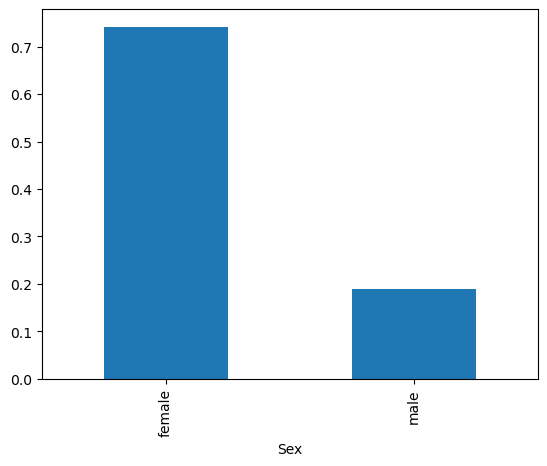

In [60]:
sex.plot(kind='bar')

In [62]:
# 特徴量として利用する列のリスト
col = ['Pclass','Age','SibSp','Parch','Fare','Sex']

x = df2[col]
t = df2['Survived']

train_score,test_score,model = learn(x,t) # 学習

ValueError: could not convert string to float: 'female'

In [64]:
male = pd.get_dummies(df2['Sex'],drop_first = True, dtype=int)
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [66]:
pd.get_dummies(df2['Sex'],dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [68]:
pd.get_dummies(df2['Embarked'],drop_first = True, dtype=int)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [70]:
embarked = pd.get_dummies(df2['Embarked'],drop_first = False, dtype=int)
embarked.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [72]:
x_tmp=pd.concat([x,male],axis=1)

x_tmp.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex,male
0,3,22.0,1,0,7.2500,male,1
1,1,38.0,1,0,71.2833,female,0


In [159]:
tmp = pd.concat([x,x],axis = 0)
tmp.shape

(1782, 6)

In [74]:
x_new = x_tmp.drop("Sex",axis=1)
for j in range(1,6): # jは木の深さ
 # xは特徴量、tは目的変数
    s1,s2,m = learn(x_new,t,depth = j)
    s='深さ{}:訓練データの精度{}::テストデータの精度{}'
    print(s.format(j,s1,s2))

深さ1:訓練データの精度0.787::テストデータの精度0.788
深さ2:訓練データの精度0.792::テストデータの精度0.782
深さ3:訓練データの精度0.847::テストデータの精度0.81
深さ4:訓練データの精度0.854::テストデータの精度0.849
深さ5:訓練データの精度0.865::テストデータの精度0.86


In [76]:
s1,s2,model = learn(x_new,t,depth = 5)

# モデルの保存
import pickle
with open('survived.pkl','wb') as f:
    pickle.dump(model,f)

In [165]:
model.feature_importances_

array([0.12084767, 0.25107251, 0.06754808, 0.00275855, 0.05145686,
       0.50631633])

In [80]:
#データフレームに変換
pd.DataFrame(model.feature_importances_,index = x_new.columns)

,0
Pclass,0.120848
Age,0.251073
SibSp,0.067548
Parch,0.002759
Fare,0.051457
male,0.506316


# 練習問題

In [83]:
df = pd.read_csv('datafolda/ex4.csv')
df.head(3)

,class,dept_id,sex,score
0,3,0,1,60.170169
1,3,5,1,86.610078
2,2,6,1,69.761279


In [85]:
df["sex"].mean()

0.5133333333333333

In [87]:
df.groupby('class').mean()['score']

class
0    68.850195
1    69.510764
2    71.611092
3    67.572909
4    68.814253
Name: score, dtype: float64

In [183]:
pd.pivot_table(df,index='class',columns='sex',values='score')

sex,0,1
class,,
0,68.358569,69.274011
1,67.472218,71.379432
2,71.704884,71.532109
3,63.897676,72.013815
4,69.952314,67.676191


In [191]:
dummy = pd.get_dummies(df['dept_id'],drop_first = True,dtype=int)

df2 = pd.concat([df,dummy],axis = 1)

df2 = df2.drop('dept_id',axis = 1)

In [193]:
df2

,class,sex,score,1,2,3,4,5,6
0,3,1,60.170169,0,0,0,0,0,0
1,3,1,86.610078,0,0,0,0,1,0
2,2,1,69.761279,0,0,0,0,0,1
3,2,1,62.597242,0,0,0,0,1,0
4,0,0,73.777754,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
295,3,0,78.099285,0,0,0,1,0,0
296,4,0,54.043671,1,0,0,0,0,0
297,2,1,74.705880,0,0,1,0,0,0
298,2,0,60.102534,0,1,0,0,0,0
